In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set()

import common
import evaluate
import nba.importer as importer

In [4]:
test_file = f"output\\nba\\test\\train.csv"
model_file = f"models\\nba\\model.pkl"

#model = common.load_model(model_file)
data, y = common.read_data_from_file(test_file, "home_win", ["counter", "home_win"])

In [6]:
data

,counter,home_win
0,101,1
1,102,1
2,103,0
3,104,1
4,105,1
5,106,0
6,107,1
7,108,1
8,109,0
9,110,1


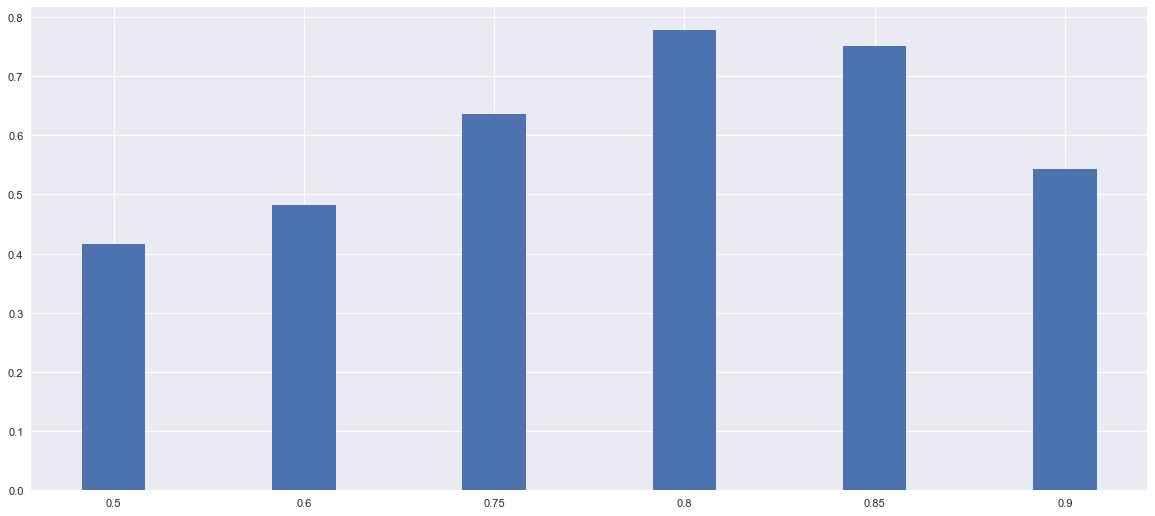

In [4]:
stats = common.confidence_stats(model, X, y)

ranges = []
pcts = []
cords = []

counter = 1
for s in stats:
    ranges.append(s.conf_range[0])
    pcts.append(s.pct)
    cords.append(counter)
    counter += 3

plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(cords, pcts, width=1, tick_label=ranges)
#plt.xticks(rotation=70)
plt.show()

In [5]:
def team_summary(data):
    
    def update_records(team_stat):
        pct = team_stat["correct"] / team_stat["total"]
        real_pct = team_stat["real"] / team_stat["total"]

        team_stat["record"] = real_pct
        team_stat["betting"] = pct

    total = 0
    correct = 0

    teams = {}

    for index, row in data.iterrows():

        features = [X.iloc[index]]

        predicted = model.predict(features)[0]
        real = y.iloc[index]

        confidences = model.predict_proba(features)[0]
        max_confidence = max(confidences)

        total += 1

        if real == predicted: correct += 1

        home = row["home"]
        away = row["away"]

        if home not in teams: teams[home]={"correct":0, "total":0, "real":0}
        if away not in teams: teams[away]={"correct":0, "total":0, "real":0}

        home_team = teams[home]
        away_team = teams[away]

        if real == 1 and predicted == 1:
            home_team["correct"] += 1
            away_team["correct"] += 1
        if real == 0 and predicted == 0:
            home_team["correct"] += 1
            away_team["correct"] += 1
        if real == 1:
            home_team["real"] += 1
        if real == 0:
            away_team["real"] += 1

        home_team["total"] += 1
        away_team["total"] += 1

        update_records(home_team)
        update_records(away_team)
        
        #print(f"{correct}/{total} = {correct/total:.4f}")
        
    return teams

In [6]:
import operator
import matplotlib.pyplot as plt

teams = team_summary(data)

names = []
betting = []
record = []
cords = []
cords_betting = []
counter = 0

for k in sorted(teams.items(), key=lambda d: d[1]["correct"]/d[1]["total"]):
    team_name = k[0]
    team_stat = k[1]
    
    pct = team_stat["correct"] / team_stat["total"]
    real_pct = team_stat["real"] / team_stat["total"]
    
    names.append(team_name)
    betting.append(pct)
    record.append(real_pct)
    
    cords.append(counter * 10)
    cords_betting.append(counter * 10 + 2)
    counter += 1
    
    #print(f"{team_name:<30} {real_pct:.2f}  {pct:.2f}")

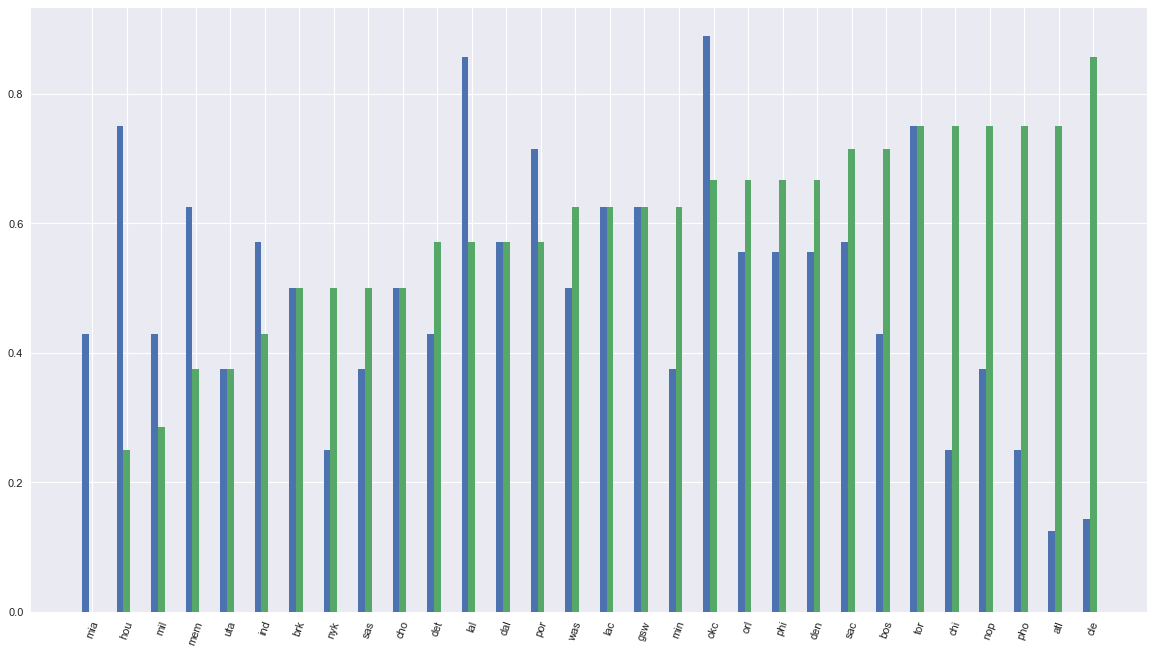

In [7]:
plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(cords, record, width=2, tick_label=names)
plt.bar(cords_betting, betting, width=2, tick_label=names)
plt.xticks(rotation=70)
plt.show()

In [8]:
result_file = "input\\nba\\2018.csv"

_, stats = importer.generate_output_and_stats(2018, result_file)

results = pd.read_csv(result_file)
results.head()

results[["34", "87"]]

,34,87
0,33,91
1,42,85
2,40,82
3,52,98
4,25,84
5,33,87
6,41,90
7,38,97
8,38,88
9,41,79


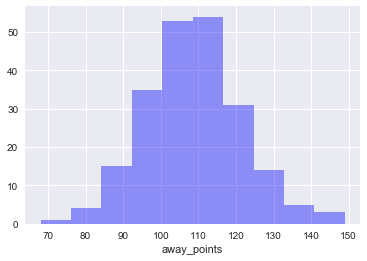

In [9]:
sns.distplot(results['away_points'], bins=10, kde=False, color="blue")

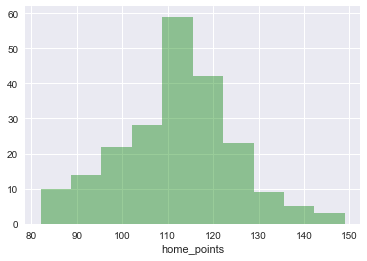

In [10]:
sns.distplot(results['home_points'], bins=10, kde=False, color="green")

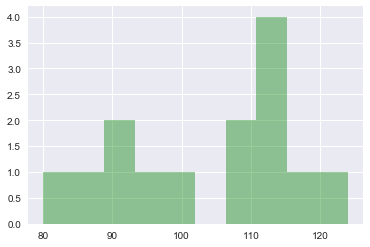

In [11]:
sns.distplot(stats["hou"]["scored"], bins=10, kde=False, color="green")

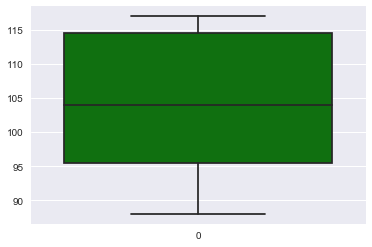

In [12]:
sns.boxplot(data=stats["orl"]["scored"], color="green")

In [13]:
def team_summary(stats, team_name):
    print(team_name)
    print(stats[team_name]["scored"])
    print(stats[team_name]["allowed"])
    print(["W" if x == 1 else "L" for x in stats[team_name]["wins"]])
    sns.boxplot(data=stats[team_name]["scored"], color="blue")
    plt.show()

por
[128, 121, 124, 128, 111, 103, 104, 132, 110, 111, 118, 116, 100, 117]
[119, 108, 125, 114, 120, 93, 85, 119, 114, 81, 103, 105, 94, 126]
['W', 'W', 'L', 'W', 'L', 'W', 'W', 'W', 'L', 'W', 'W', 'W', 'W', 'L']


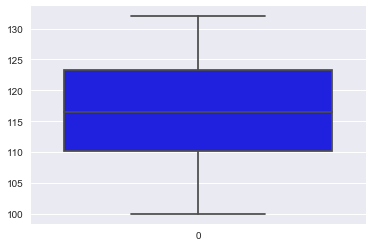


vs

min
[108, 131, 136, 101, 105, 95, 124, 128, 99, 81, 109, 110, 110, 120, 107]
[112, 123, 140, 91, 112, 125, 120, 125, 116, 111, 120, 114, 121, 113, 100]
['L', 'W', 'L', 'W', 'L', 'L', 'W', 'W', 'L', 'L', 'L', 'L', 'L', 'W', 'W']


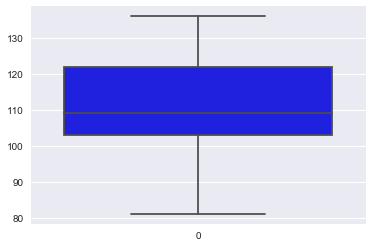

In [14]:
team_summary(stats, "por")
print()
print("vs")
print()
team_summary(stats, "min")

In [ ]:
sns.boxplot(data=stats["sas"]["scored"], color="blue")

In [ ]:
stats["San Antonio Spurs"]["scored"]